将google云盘中的csv存入/content/data下

In [ ]:
import os
import shutil
!mkdir datas
for folderName, subfolders, filenames in os.walk('/content/drive/MyDrive/eating'):
  print(folderName)
  for filename in filenames:
    if '.csv' in filename:
      print(filename)
      try:
        shutil.copy(folderName+'/' +filename,'/content/datas/'+filename)
      except OSError:
        pass
for folderName, subfolders, filenames in os.walk('/content/drive/MyDrive/running'):
  print(folderName)
  for filename in filenames:
    if '.csv' in filename:
      print(filename)
      try:
        shutil.copy(folderName+'/' +filename,'/content/datas/'+filename)
      except OSError:
        pass
for folderName, subfolders, filenames in os.walk('/content/drive/MyDrive/walking'):
  print(folderName)
  for filename in filenames:
    if '.csv' in filename:
      print(filename)
      try:
        shutil.copy(folderName+'/' +filename,'/content/datas/'+filename)
      except OSError:
        pass
for folderName, subfolders, filenames in os.walk('/content/drive/MyDrive/jumping'):
  print(folderName)
  for filename in filenames:
    if '.csv' in filename:
      print(filename)
      try:
        shutil.copy(folderName+'/' +filename,'/content/datas/'+filename)
      except OSError:
        pass

读取文件夹下所有文件（csv），按照文件名进行分组

In [ ]:
CLASSIFY_NUMBER = 4
FRAME_NUMBER = 72
ADD_FRAME_NUMBER = 47
ORIGINAL_FRAME_NUMBER = 48
COL_NUMBER = 40
filepath="/content/datas/"
!rmdir /content/datas/.ipynb_checkpoints
files = os.listdir(filepath)
print(files)
file_numbers = len(files)
print(file_numbers)

rmdir: failed to remove '/content/datas/.ipynb_checkpoints': No such file or directory
['cat_eating_3DLC_resnet50_DLC_ProjectSep22shuffle1_75000.csv', 'cat_walking_24DLC_resnet50_DLC_ProjectSep22shuffle1_75000.csv', 'cat_jumping_53DLC_resnet50_DLC_ProjectSep22shuffle1_75000.csv', 'cat_walking_5DLC_resnet50_DLC_ProjectSep22shuffle1_75000.csv', 'cat_jumping_17DLC_resnet50_DLC_ProjectSep22shuffle1_75000.csv', 'cat_eating_50DLC_resnet50_DLC_ProjectSep22shuffle1_75000.csv', 'cat_jumping_19DLC_resnet50_DLC_ProjectSep22shuffle1_75000.csv', 'cat_jumping_63DLC_resnet50_DLC_ProjectSep22shuffle1_75000.csv', 'cat_walking_87DLC_resnet50_DLC_ProjectSep22shuffle1_75000.csv', 'cat_jumping_66DLC_resnet50_DLC_ProjectSep22shuffle1_75000.csv', 'cat_running_1DLC_resnet50_DLC_ProjectSep22shuffle1_75000.csv', 'cat_eating_77DLC_resnet50_DLC_ProjectSep22shuffle1_75000.csv', 'cat_jumping_81DLC_resnet50_DLC_ProjectSep22shuffle1_75000.csv', 'cat_eating_69DLC_resnet50_DLC_ProjectSep22shuffle1_75000.csv', 'cat_jump

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
import pandas as pd
import re

批量处理csv

In [ ]:
y_sum = np.empty(shape=(0,CLASSIFY_NUMBER))
first_loop = True
count = 0
for file_name in files:
  if((file_name != '.config') and (file_name != 'sample_data')):
    PATH = filepath + file_name
    print(PATH)
    pd_tmp = pd.read_csv(PATH,header=1,usecols=lambda x:x!="bodyparts")
    pd_tmp = pd_tmp.drop(index = 0)
    np_tmp = pd_tmp.to_numpy()
    if(len(np_tmp)!=FRAME_NUMBER):
      count = count+1
      file_numbers = file_numbers-1
      continue
    np_tmp = np_tmp[:FRAME_NUMBER,:60]
    if(first_loop):
      np_sum = np_tmp;
      first_loop = False
    else:
      np_sum = np.append(np_sum, np_tmp, axis=0)
    #构建Y_train
    #if(re.match("sleep*",file_name) is not None): #自己找
      #y_sum = y_sum.append("sleep")
      #y_sum = np.append(y_sum,"sleep")
      #y_sum = np.append(y_sum,[1,0,0,0])
    if(re.match("cat_running",file_name)is not None):
      y_sum = np.append(y_sum,"run")
      print("run")
    elif(re.match("cat_poo",file_name)is not None): #自己找
      y_sum = np.append(y_sum,"poo")
      print("poo")
    elif(re.match("cat_jumping",file_name)is not None): #jumping eating walking
      y_sum = np.append(y_sum,"jump")
      print("jump")
    elif(re.match("cat_eating",file_name)is not None):
      y_sum = np.append(y_sum,"eat")
      print("eat")
    elif(re.match("cat_walking",file_name)is not None):
      y_sum = np.append(y_sum,"walk")
      print("walk")
    #else:
     # y_sum = np.append(y_sum,"else")
# print(count)

In [ ]:
print(count)

50


In [ ]:
print(np_sum.shape)
print(np_sum)

print(y_sum)

使用MinMaxScaler归一化数据

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#mydata[['x1','x2','x3']] = MinMaxScaler().fit_transform(mydata[['x1','x2','x3']])
scaler = MinMaxScaler()
flag = True;
#choose_np = np.array([])
#for i in range(60):
#  if(i%3 != 2):
#    choose_np = np.append(choose_np,[i])
#print(choose_np)
#np_sum[:,choose_np] = scaler.fit_transform(np_sum[:,choose_np)
for j in range(len(np_sum)):
  x_cor_tmp = np_sum[j][::3]
  #print(x_cor_tmp)
  y_cor_tmp = np_sum[j][1::3]
  #print(x_cor_tmp.reshape(-1,1))
  x_cor_tmp = scaler.fit_transform(x_cor_tmp.reshape(-1,1))
  y_cor_tmp = scaler.fit_transform(y_cor_tmp.reshape(-1,1))
  if(flag): #create a new np array
    flag = False;
    np_after_scaled =np.concatenate([x_cor_tmp.flatten(),y_cor_tmp.flatten(),np_sum[j][2::3]],axis = 0) 

  else: #
    np_after_scaled = np.vstack([np_after_scaled,np.concatenate([x_cor_tmp.flatten(),y_cor_tmp.flatten(),np_sum[j][2::3]],axis = 0)])
    

print(np_after_scaled.shape)

(14544, 60)


数据预处理（2D转3D）
X_train

In [ ]:
np_3d = np_after_scaled.reshape(file_numbers,48,60)  # N samples, 48 time steps, 60 features per time step
print(np_3d.shape)
print(np_3d.size)
print(np_3d)

数据插帧（每两帧间）

In [ ]:

# import matplotlib.pyplot as plt 
# import random
# x_axis = np.arange(48)
# x_axis = x_axis.astype(np.float64)


# print(x_axis)
# first_3d_frame = True
# first_print = True

# for i in range (np_3d.size//( 60 * ORIGINAL_FRAME_NUMBER )):
#   np_before_interpolant = np_3d[i]

#   count = 1
#   first_loop = True
#   for j in range(40):
#     x_to_interpolant = np.arange(0.5,ADD_FRAME_NUMBER+0.5,1)
    
#     for k in range (ADD_FRAME_NUMBER):
#       x_to_interpolant[k] = x_to_interpolant[k] + random.random()*0.2-0.1

#     np_flatten = np_before_interpolant[:,j].tolist()

#     np_after_interpolant = np.interp(x_to_interpolant, x_axis,np_flatten)

#     ls_1d_95frames = list()
#     ls_1d_95frames.clear()



    
#     for l in range (48): #将原帧和插值帧拼接
#       if(l<47):
#         ls_1d_95frames.append(np_flatten[l])
#         ls_1d_95frames.append(np_after_interpolant[l])
#       else:
#         ls_1d_95frames.append(np_flatten[l])

#     np_1d_95frames = np.array(ls_1d_95frames)
#     np_1d_95frames = np_1d_95frames.reshape(95,1)
#     if(first_print):
#       first_print = False

#     if(first_loop):
#       first_loop = False
#       np_interpolant_sum_2d = np_1d_95frames

      
#     else:
#       np_interpolant_sum_2d = np.hstack((np_interpolant_sum_2d,np_1d_95frames))
#       count = count+1


#   if(first_3d_frame):
#     first_3d_frame = False
#     np_interpolant_sum_3d = np_interpolant_sum_2d
#     print(np_interpolant_sum_3d)
#   else:
#     np_interpolant_sum_3d = np.vstack([np_interpolant_sum_3d,np_interpolant_sum_2d])

# np_interpolant_sum_3d = np_interpolant_sum_3d.reshape(file_numbers,FRAME_NUMBER,COL_NUMBER)
# print(np_interpolant_sum_3d.shape)
# print(np_interpolant_sum_3d)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47.]
[[0.39149112 0.47379769 0.23851951 ... 0.69093333 0.50419712 0.36117588]
 [0.39661532 0.47708476 0.24284104 ... 0.68009727 0.48440284 0.34299254]
 [0.40325358 0.48045033 0.24664823 ... 0.67193782 0.47118749 0.32908641]
 ...
 [0.34018843 0.42693087 0.20293732 ... 0.58478211 0.37089683 0.308833  ]
 [0.34020932 0.4260889  0.20262135 ... 0.58564365 0.37126979 0.3093295 ]
 [0.34022919 0.42538966 0.20234087 ... 0.58656226 0.37165878 0.30970951]]
(303, 95, 40)
[[[0.39149112 0.47379769 0.23851951 ... 0.69093333 0.50419712 0.36117588]
  [0.39661532 0.47708476 0.24284104 ... 0.68009727 0.48440284 0.34299254]
  [0.40325358 0.48045033 0.24664823 ... 0.67193782 0.47118749 0.32908641]
  ...
  [0.34018843 0.42693087 0.20293732 ... 0.58478211 0.37089683 0.308833  ]
  [0.34020932 0.4260889  0.20262135 ... 0.58

将Y使用one hot 编码

In [ ]:
print(y_sum)

['eat' 'walk' 'jump' 'walk' 'jump' 'eat' 'jump' 'jump' 'walk' 'jump' 'run'
 'eat' 'jump' 'eat' 'jump' 'walk' 'jump' 'run' 'jump' 'run' 'walk' 'eat'
 'jump' 'walk' 'eat' 'walk' 'walk' 'eat' 'eat' 'jump' 'walk' 'eat' 'run'
 'jump' 'eat' 'jump' 'run' 'jump' 'walk' 'eat' 'walk' 'eat' 'run' 'eat'
 'run' 'run' 'walk' 'walk' 'eat' 'eat' 'run' 'eat' 'run' 'run' 'eat'
 'walk' 'eat' 'eat' 'jump' 'eat' 'jump' 'run' 'jump' 'jump' 'walk' 'eat'
 'eat' 'run' 'walk' 'eat' 'jump' 'walk' 'run' 'run' 'walk' 'run' 'walk'
 'eat' 'walk' 'run' 'run' 'walk' 'walk' 'eat' 'run' 'run' 'walk' 'eat'
 'eat' 'eat' 'walk' 'eat' 'eat' 'jump' 'walk' 'eat' 'run' 'run' 'walk'
 'jump' 'run' 'run' 'run' 'walk' 'walk' 'jump' 'run' 'eat' 'walk' 'eat'
 'walk' 'jump' 'eat' 'walk' 'eat' 'eat' 'walk' 'jump' 'jump' 'eat' 'run'
 'jump' 'run' 'walk' 'walk' 'jump' 'run' 'eat' 'run' 'walk' 'walk' 'eat'
 'run' 'walk' 'run' 'jump' 'run' 'walk' 'walk' 'eat' 'walk' 'eat' 'eat'
 'eat' 'walk' 'eat' 'eat' 'jump' 'eat' 'jump' 'jump' 'eat' 'e

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc  = OneHotEncoder()
# print(y_sum)
# y_sum = enc.fit_transform(y_sum.reshape(-1,1))
# print(y_sum)


a = ["jump", "run", "eat", "walk"]
num_label = pd.Categorical(a).codes
print(num_label)
y_onehot = np.asarray(pd.get_dummies(y_sum), dtype=np.int8)
print(y_onehot)
y_onthot = np.asarray(y_onehot).astype(np.float32)
np_3d = np.asarray(np_3d).astype(np.float32)

[1 2 0 3]
[[1 0 0 0]
 [0 0 0 1]
 [0 1 0 0]
 ...
 [1 0 0 0]
 [0 0 1 0]
 [0 1 0 0]]


分割训练集和测试集

In [ ]:
from sklearn.model_selection import train_test_split
# X_train, X_test, Y_train, Y_test = train_test_split(np_interpolant_sum_3d,y_onehot, test_size = 0.05, random_state = 42)
X_train, X_test, Y_train, Y_test = train_test_split(np_3d,y_onehot, test_size = 0.05, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(287, 95, 40) (287, 4)
(16, 95, 40) (16, 4)


实例化模型

In [ ]:
# #inputs = keras.Input(shape=())
# model = keras.Sequential()
# model.add(layers.Dense(60))
# model.add(layers.Dropout(0.1))
# model.add(layers.LSTM(128,input_shape=(48,60))) #1 or more samples, 48 time steps, 60 features when likelihood counts
# #model.add(layers.dense(4))
# model.add(layers.Dense(CLASSIFY_NUMBER,activation='softmax'))


#inputs = keras.Input(shape=())
model = keras.Sequential()
# model.add(layers.Dropout(0.2))
# model.add(layers.Conv1D(60,3,activation='relu',input_shape=(48,60)))
# 
# model.add()
model.add(layers.LSTM(64,input_shape=(FRAME_NUMBER,COL_NUMBER),activation = 'tanh',bias_regularizer=keras.regularizers.l2(l=0.001))) #1 or more samples, 47 time steps, 60 features when likelihood counts
# model.add(layers.LSTM(32,activation='tanh')) 
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(CLASSIFY_NUMBER,activation='softmax'))

编译

In [ ]:
from keras import optimizers
adam = tf.keras.optimizers.Adam(lr=0.001)
# sgd = optimizers.sgd(lr=0.001)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0,patience=10,verbose=1)

model.compile(loss='categorical_crossentropy',optimizer=adam,metrics='categorical_accuracy')
model.build(input_shape=(None,FRAME_NUMBER,COL_NUMBER))
# model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                26880     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 4)                 260       
                                                                 
Total params: 31,300
Trainable params: 31,300
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


训练模型

In [ ]:
batch_size = 32
history = model.fit(
    X_train,
    Y_train, 
    epochs=200, 
    batch_size=batch_size,
    validation_split=0.2
    #callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)]
)
print("history.history:{}".format(history.history))

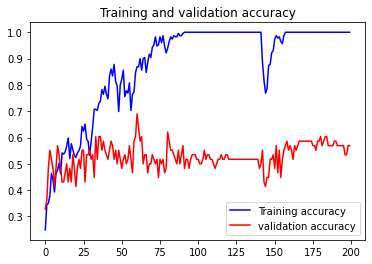

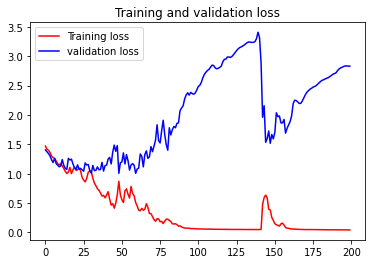

In [ ]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs,acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

评估

In [ ]:
loss,accuracy = model.evaluate(X_test,Y_test)